## 这个要做的事是读取single_links分析下prop拦截值取多少

In [1]:
import json
import os,fnmatch
import matplotlib.pyplot as plt    
import jutil

In [24]:
def get_probs(path):
    probs = []
    num = []
    with open(path, 'r') as f:
        l = f.readlines()
        for x in l:
            d = json.loads(x)
            probs.append(d['prob'])
            num.append(d['total'])
    return probs,num

In [2]:
path = "/home/jimo/workspace/Git/great-design/relation-data/"
files = fnmatch.filter(os.listdir(path),'*_single_links.txt')
files

['0101_single_links.txt',
 '0901_single_links.txt',
 '0201_single_links.txt',
 '0307_single_links.txt',
 '0402_single_links.txt',
 '0215_single_links.txt',
 '0408_single_links.txt',
 '0501_single_links.txt']

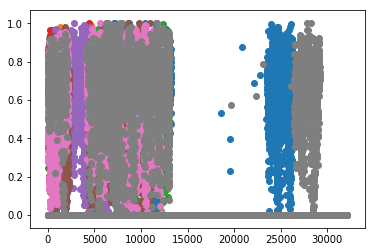

In [25]:
nums = []
for file in files:
    probs,num = get_probs(os.path.join(path,file))
    plt.scatter(list(range(len(probs))),probs)
    nums.append(num)
plt.show()

for num in nums:
    plt.scatter(list(range(len(num))),num)
    plt.ylim((0,10000))
plt.show()

### 从上面可知,有很多都是0.0,所以只要舍去0就行了

## 看下权重应该怎么分才能保证节点大小有差别

原先代码的写法:
    ```python
    node['symbolSize'] = v['edgeCount'] + v['probSum'] * 2
    ```

In [3]:
def get_single_links(path):
    links = []
    with open(path, 'r') as f:
        l = f.readlines()
        for x in l:
            d = json.loads(x)
            links.append(d)
    return links

In [7]:
def add_one_node_record(nodeRecord, name, prob):
    if name in nodeRecord:
        nodeRecord[name]['edgeCount'] += 1
        nodeRecord[name]['probSum'] += prob
    else:
        record = dict()
        record['edgeCount'] = 1
        record['probSum'] = prob
        nodeRecord[name] = record
        
def get_size(single_links):
    nodeRecord = dict()  # 帮助计算node,存储的结构{name:{edgeCount:0,probSum:0.0}}
    links = []
    for slink in single_links:
        link = dict()
        link['source'] = slink['source']
        link['target'] = slink['target']
        links.append(link)
        # 舍弃掉那些人数少的例子
        if slink['total'] > 30 and slink['prob'] > 0.5:
            add_one_node_record(nodeRecord, slink['source'], slink['prob'])
#             add_one_node_record(nodeRecord, slink['target'], slink['prob'])
    cnt = [d['edgeCount'] for d in nodeRecord.values()]
    prob = [d['probSum'] for d in nodeRecord.values()]
    # 计算nodes
    nodes = []
    for name, v in nodeRecord.items():
        node = dict()
        node['category'] = 0
        node['name'] = name
        node['symbolSize'] = v['edgeCount'] + v['probSum']
        nodes.append(node)
    return cnt,prob,nodes,links

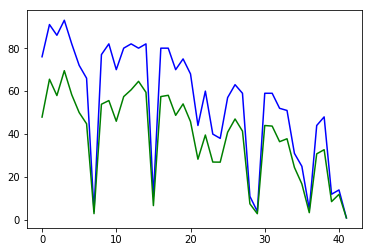

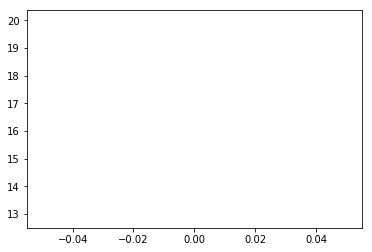

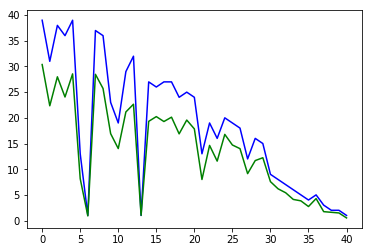

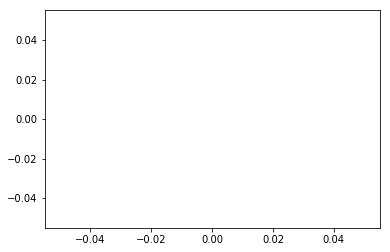

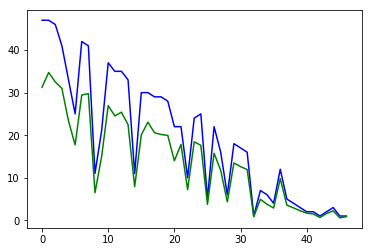

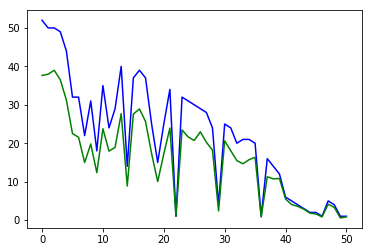

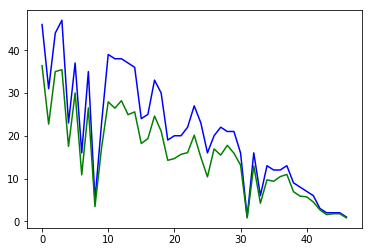

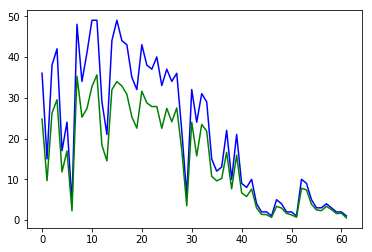

In [8]:
cnts = []
probs = []
d_nodes = dict()
for file in files:
    links = get_single_links(os.path.join(path,file))
    cnt,prob,nodes,links = get_size(links)
    d = dict()
    d['nodes'] = nodes
    d['links'] = links
    d_nodes[file] =  d
    plt.plot(cnt,'b')
#     plt.scatter(list(range(len(prob))),prob)
    plt.plot(prob,'g')
    cnts.append(cnt)
    probs.append(prob)
    plt.show()

In [9]:
# 重新写入文件
for file,d in d_nodes.items():
    node_path = os.path.join(path,file[:file.find('_')] + '_nodes.txt')
    link_path = os.path.join(path,file[:file.find('_')] + '_links.txt')
    jutil.dump_obj(path=node_path,obj=d['nodes'])
    jutil.dump_obj(path=link_path,obj=d['links'])